In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета

In [256]:
df = pd.read_csv('vtb_dataset_target.csv', sep=';', encoding='cp1251')

df['month_date_open_pc'] = (df
                             .astype('str')
                             .date_open_pc
                             .apply(lambda x: x[:8] + '01')
                             .astype('datetime64')                    
                           )

## Убираем строки без данных спарк (среди них не было таргетов)

In [257]:
df = df.loc[lambda x: (x.target==1) | x.spark_data_is_exist.notna()]

In [258]:
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(67143, 85)


,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target,spark_data_is_exist,Дата загрузки заявки,Количество компаний с аналогичным директором в том же регионе,"Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица","Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиента участие государства более 50,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства № 91-Р,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработку персональных данных",5 - Сработал признак «ЮЛ осуществляет отчисления в ПФР по сотрудникам».,"6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»","7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,"17 - Юр. лица, имеющие задолженность по уплате налогов","17 - Юр. лица, не предоставляющие налоговую отчетность более года",24 - вхождение в список недобросовестных поставщиков.,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российском юридическом лице,Сведения об учредителе (участнике) - иностранном юридическом лице,Сведения об учредителе (участнике) - физическом лице,"Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании","Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ,19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей,diff_date_inquiry_spark_data,is_credit,month_date_open_pc
0,QZSCOUYDPK,ЮЛ,2019-03-13 00:00:00,2019-03-13 12:12:00,2019-03-13 00:00:00,NaN,NaN,0,NaN,NaN,0,QZSCOUYDPK,2019-03-13 12:12:00,2.0,Нет,1.0,10.0,52.24,JH,10000.0,NaN,NaN,NaN,NaN,24.01.2018,1.0,24.01.2018,24.01.2018,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65-Общества с ограниченной ответственностью,False,Нет,NaN,NaN,Нет,Нет,Нет,Нет,NaN,Нет,1.0,2.0,2.0,Нет,Нет,NaN,NaN,NaN,NaN,NaN,68.0,Средний риск,NaN,NaN,61.0,Средний риск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ЮЛ: 24.01.2018 0:00:00,0.0,NaN,2019-03-01
1,XGJYAHPQJUMT,ИП,2019-02-18 00:00:00,2019-02-18 10:44:00,2019-02-18 00:00:00,NaN,NaN,0,NaN,NaN,0,XGJYAHPQJUMT,2019-02-18 10:44:00,0.0,Нет,NaN,3.0,47.78,IC,N

In [259]:
df.target.sum()

7000

In [260]:
df.dtypes

inn                                     object
org_type                                object
Дата заявки день                        object
date_inquiry                            object
date_open_pc                            object
                                     ...      
23 - Учредители - физлица              float64
История смены сооучредителей            object
diff_date_inquiry_spark_data           float64
is_credit                              float64
month_date_open_pc              datetime64[ns]
Length: 85, dtype: object

## 1. Общие характеристики датасета

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67143 entries, 0 to 67142
Data columns (total 85 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                           --------------  -----         
 0   inn                                                                                                                              67143 non-null  object        
 1   org_type                                                                                                                         67143 non-null  object        
 2   Дата заявки день                                                                                                                 67143 non-null  object        
 3   date_inquiry                                                 

In [191]:
# Процентное соотношение пропусков
pd.set_option('display.max_columns', 100)
(df.isnull().mean() * 100).reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
index,inn,org_type,Дата заявки день,date_inquiry,date_open_pc,date_close_pc,diff_days,diff_days_inquiry_order,date_block,block_days,target,spark_data_is_exist,Дата загрузки заявки,Количество компаний с аналогичным директором в...,"Компания входит в: Юридические лица, в состав ...","Количество компаний, зарегистрированных на адр...",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,налоговая нагрузка,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество дочерних,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,2 - В учредителях/участниках/ акционерах клиен...,3 - ФСФР,3 - РТС,4 - Перечень ОАО по Распоряжению Правительства...,"4 - Перечень ФГУП, имеющих существенное значение",4 - Реестр оборонно-промышленного комплекса,"4 - Реестр операторов, осуществляющих обработк...",5 - Сработал признак «ЮЛ осуществляет отчисле...,"6 - Организация, первое лицо, учредители входи...",7 - массовый контактный телефон: в заявке указ...,8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директор...,"17 - Юр. лица, имеющие задолженность по уплате...","17 - Юр. лица, не предоставляющие налоговую от...",24 - вхождение в список недобросовестных поста...,25 - Государственные заказы и контракты Принял...,25 - Государственные заказы и контракты Количе...,25 - Коммерческие заказы и контракты Приняла у...,25 - Коммерческие заказы и контракты Количеств...,Индекс финансового риска,Индекс финансового риска описание,Индекс платежной дисциплины,Индекс платежной дисциплины описание,Индекс должной осмотрительности,Индекс должной осмотрительности описание,Сведения об учредителе (участнике) - российско...,Сведения об учредителе (участнике) - иностранн...,Сведения об учредителе (участнике) - физическо...,Сведения об учредителе (участнике) - Российско...,"Сведения о паевом инвестиционном фонде, в сост...",15 - КодОПФ,15 - ПолнНаимОПФ,16 - Размер уставного капитала НаимВидКап,16 - Размер уставного капитала СумКап,18 - Сравниваем сведения о первом лице со свед...,19 - Суммируем %% размеры долей учредителей – ...,20 - Срок регистрации клиента,21 - КодОКВЭД,21 - ПрВерсОКВЭД,23 - a.\tУправляющая организация – берем данны...,23 - b. Гендиректор – ФЛ,23 - Учредители и их изменение,23 - Учредители – иностранные компании,23 - Учредители - физлица,История смены сооучредителей,diff_date_inquiry_spark_data,is_credit,month_date_open_pc
0,0,0,0,0,0,77.6269,77.6269,0,87.0828,87.0828,0,0,0,0.655318,0.406595,47.089,0.512339,0.518297,0.154893,48.078,80.7307,77.1503,77.5435,100,47.1844,47.089,47.4182,0.409574,99.087,47.089,75.5596,71.7498,91.1711,91.1711,86.0134,0.406595,0,0,100,100,0.406595,0.406595,0.406595,0.406595,100,0,47.089,47.089,0.655318,0.406595,0.406595,100,89.5864,89.5864,91.1711,91.1711,49.9173,47.1188,99.3789,99.3789,48.2939,47.1188,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,47.4182,0,95.5572,0


In [192]:
## Посмотрим значения фичей, чтобы определеить их тип
for col in df.columns:
    print('Уникальных значений', df[col].value_counts().shape)
    print(df[col].value_counts().head(10))
    print('----------------------------')

Уникальных значений (65047,)
AGLSEBFWDV      44
QWZGVJAQVX      15
NUYSHDQNDH      12
EEOUKZVZHU      10
HAAKULNCVKVB    10
VSGGQVPMIM      10
RVSIIDVCPBED     8
JZXIJDTFPU       8
MLRJLUWJJDQS     8
NBFMRIGRMG       8
Name: inn, dtype: int64
----------------------------
Уникальных значений (2,)
ЮЛ    35675
ИП    31468
Name: org_type, dtype: int64
----------------------------
Уникальных значений (417,)
2019-03-25 00:00:00    609
2019-03-18 00:00:00    584
2019-03-27 00:00:00    568
2019-03-21 00:00:00    565
2019-03-14 00:00:00    564
2019-03-28 00:00:00    540
2019-03-26 00:00:00    536
2019-04-25 00:00:00    534
2019-04-22 00:00:00    531
2019-03-19 00:00:00    529
Name: Дата заявки день, dtype: int64
----------------------------
Уникальных значений (52785,)
2019-03-13 09:20:00    45
2019-04-24 17:16:00    13
2019-03-18 12:37:00    11
2019-03-26 18:07:00    11
2019-03-19 11:45:00    10
2018-10-30 11:28:00     9
2018-12-03 11:36:00     9
2019-02-06 16:25:00     7
2019-04-04 10:45:00  

Нет    66870
Name: 4 - Реестр оборонно-промышленного комплекса, dtype: int64
----------------------------
Уникальных значений (1,)
Нет    66870
Name: 4 - Реестр операторов, осуществляющих обработку персональных данных, dtype: int64
----------------------------
Уникальных значений (0,)
Series([], Name: 5 - Сработал признак  «ЮЛ осуществляет отчисления в ПФР по сотрудникам»., dtype: int64)
----------------------------
Уникальных значений (2,)
Нет    67090
Да        53
Name: 6 - Организация, первое лицо, учредители входит в список «дисквалифицированных», dtype: int64
----------------------------
Уникальных значений (121,)
0.0    19767
1.0     7540
2.0     3832
3.0     1637
4.0      754
5.0      424
6.0      261
7.0      184
8.0      140
9.0      132
Name: 7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов), dtype: int64
----------------------------
Уникальных значений (146,)
1.0     15925
2.0      7747
3.0      33

### Наблюдения

1. 'Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица'    
Фича содержит пустые значения, либо Нет. Почти везде Нет

2. 'налоговая нагрузка' - полностью пустое поле

3. дата начала полномочий руководителя - у некторых значений даты списком. Можно распарсить, найти максимальную или минимальную дату, посчитать, сколько дней руководитель в должности от даты заявки/открытия счета   

4. Даты внесения соучредителей -такая же логика, что и в п.3    
 
5. 'Дата регистрации' -такая же логика, что и в п.3   

6. 'Количество филиалов' - у всех 0 либо nan. Заменим nan на 1 - считаем, что это нет информации    

7. 2 - В учредителях/участниках/ акционерах клиента участие государства  более 50/ 
   '4 - Перечень ОАО по Распоряжению Правительства № 91-Р'  Почти везде Нет. Удаляем    

8. '3 - ФСФР', '3 - РТС'. Пустые поля удаляем 

9. Такие же как п.7-8 
       '4 - Перечень ОАО по Распоряжению Правительства № 91-Р',
       '4 - Перечень ФГУП, имеющих существенное значение ',
       '4 - Реестр оборонно-промышленного комплекса',
       '4 - Реестр операторов, осуществляющих обработку персональных данных',
       '6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»'
       '5 - Сработал признак  «ЮЛ осуществляет отчисления в ПФР по сотрудникам».',  
       '17 - Юр. лица, имеющие задолженность по уплате налогов',
       '17 - Юр. лица, не предоставляющие налоговую отчетность более года',
       '24 - вхождение в список недобросовестных поставщиков. ',       Удаляем
       
10. 'Индекс платежной дисциплины описание' - повторяет по смыслу 'Индекс платежной дисциплины описание'. Одно поле удаляем   
11.  'Индекс должной осмотрительности',- 'Индекс должной осмотрительности описание' Также один убираем   
12. Пустые поля удаляем


       'Количество дочерних
       'Сведения об учредителе (участнике) - российском юридическом лице',
       'Сведения об учредителе (участнике) - иностранном юридическом лице',
       'Сведения об учредителе (участнике) - физическом лице',
       'Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании',
       'Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале ',
       '15 - КодОПФ', '15 - ПолнНаимОПФ',
       '16 - Размер уставного капитала НаимВидКап',
       '16 - Размер уставного капитала СумКап',
       '18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ',
       '19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции',
       '20 - Срок регистрации клиента', '21 - КодОКВЭД', '21 - ПрВерсОКВЭД',
       '23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг',
       '23 - b. Гендиректор – ФЛ ', '23 - Учредители и их изменение',
       '23 - Учредители – иностранные компании', '23 - Учредители - физлица'    

13.'История смены сооучредителей' - также можно выделить количество дней от смены учредителей или их количество, частоту за последнее время           
14. 'код основного оквэд' - более 1500 Разновидностей. Надо обобщить


# 2. Пребразование признаков и их типов

### Для других выборок нужно будет повторить все преобразования типов и заполнения данных

In [261]:
#Исходя из наблюдений выше преобразуем некторые признаки
df['Количество филиалов'].fillna(1, inplace=True)
df['Кредиты'] = df['Кредиты'].astype('int')
df['is_credit'].fillna(0, inplace=True)

In [262]:
category_columns = ['Субъект местонахождения', 'Отчетный период (год)' ,'Численность компании',
                     'Участие в госконтрактах (год)', 'ОПФ Организации', 'код основного оквэд',
                     'Индекс финансового риска описание',
                     'Индекс должной осмотрительности описание']


float_columns = ['Количество компаний с аналогичным директором в том же регионе',
       'Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС',
       'Количество видов деятельности у Клиента',
       'размер уставного капитал ЮЛ',
       'Чистая прибыль (или убыток) компании',
       'Пассивы всего',
       'Количество соучредителей',
        'Количество филиалов', 
       'Выручка компании (млн, руб)', 'Участие в госконтрактах (количество)', 'Сумма налога', 'Кредиты',
       '7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)',
       '8 - Количество компаний с аналогичным директором',
       '8 - Количество компаний с аналогичным директором в том же регионе',
       '25 - Государственные заказы и контракты Приняла участие (количество)',
       '25 - Государственные заказы и контракты Количество заключенных контрактов',
       '25 - Коммерческие заказы и контракты Приняла участие (количество)',
       '25 - Коммерческие заказы и контракты Количество заключенных контрактов',
       'is_credit']


del_columns=['налоговая нагрузка', '2 - В учредителях/участниках/ акционерах клиента участие государства  более 50 ',
             'Количество дочерних', 
             '3 - ФСФР', '3 - РТС', '4 - Перечень ОАО по Распоряжению Правительства № 91-Р',
             '4 - Перечень ОАО по Распоряжению Правительства № 91-Р',
             '4 - Перечень ФГУП, имеющих существенное значение ',
             '4 - Реестр оборонно-промышленного комплекса',
             '4 - Реестр операторов, осуществляющих обработку персональных данных',
             '5 - Сработал признак  «ЮЛ осуществляет отчисления в ПФР по сотрудникам».',
             '6 - Организация, первое лицо, учредители входит в список «дисквалифицированных»',
             '17 - Юр. лица, имеющие задолженность по уплате налогов',
             '17 - Юр. лица, не предоставляющие налоговую отчетность более года',
             '24 - вхождение в список недобросовестных поставщиков. ',
             'Индекс финансового риска', 'Индекс платежной дисциплины', 'Индекс должной осмотрительности', 
             'Сведения об учредителе (участнике) - российском юридическом лице',
             'Сведения об учредителе (участнике) - иностранном юридическом лице',
             'Сведения об учредителе (участнике) - физическом лице',
             'Сведения об учредителе (участнике) - Российской Федерации, субъекте Российской Федерации, муниципальном образовании',
             'Сведения о паевом инвестиционном фонде, в состав имущества которого включена доля в уставном капитале ',
             'Индекс платежной дисциплины описание', 
             'Компания входит в: Юридические лица, в состав исполнительных органов которых входят дисквалифицированные лица',
             '15 - КодОПФ', '15 - ПолнНаимОПФ',
             '16 - Размер уставного капитала НаимВидКап',
             '16 - Размер уставного капитала СумКап',
             '18 - Сравниваем сведения о первом лице со сведениями 100% учредителя-ФЛ',
             '19 - Суммируем %% размеры долей учредителей – иностранных ЮЛ из секции',
             '20 - Срок регистрации клиента', '21 - КодОКВЭД', '21 - ПрВерсОКВЭД',
             '23 - a.\tУправляющая организация – берем данные из секции СвУпрОрг',
             '23 - b. Гендиректор – ФЛ ', '23 - Учредители и их изменение',
             '23 - Учредители – иностранные компании', '23 - Учредители - физлица',
             'Дата заявки день', 'date_inquiry', 'date_close_pc', 'diff_days', 'diff_days_inquiry_order', 'date_block', 
             'block_days', 'spark_data_is_exist', 'Дата загрузки заявки', 'diff_date_inquiry_spark_data']

datetime_columns = ['дата начала полномочий руководителя', 'Даты внесения соучредителей', 
                   'Дата регистрации', 'История смены сооучредителей',
                   'date_open_pc', 'month_date_open_pc']

### Приведем типы, исключаем колонки

In [263]:
df = df.drop(del_columns, axis=1)

for col in category_columns:
    df[col] = df[col].astype('str')
    
for col in float_columns:
    try:
        df[col] = df[col].astype('float')
    except:
        df[col] = df[col].astype('str').apply(lambda x: x.replace(',', '.')).astype('float')
        print(col)
        df[col] = df[col].astype('float') 

Выручка компании (млн, руб)


# 3. Анализ признаков

In [196]:
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(67143, 37)


,inn,org_type,date_open_pc,target,Количество компаний с аналогичным директором в том же регионе,"Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,Кредиты,"7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,25 - Государственные заказы и контракты Приняла участие (количество),25 - Государственные заказы и контракты Количество заключенных контрактов,25 - Коммерческие заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска описание,Индекс должной осмотрительности описание,История смены сооучредителей,is_credit,month_date_open_pc
0,QZSCOUYDPK,ЮЛ,2019-03-13 00:00:00,0,2.0,1.0,10.0,52.24,JH,10000.0,NaN,nan,NaN,24.01.2018,1.0,24.01.2018,24.01.2018,0.0,nan,NaN,NaN,nan,NaN,65-Общества с ограниченной ответственностью,0.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,Средний риск,Средний риск,ЮЛ: 24.01.2018 0:00:00,0.0,2019-03-01
1,XGJYAHPQJUMT,ИП,2019-02-18 00:00:00,0,0.0,NaN,3.0,47.78,IC,NaN,NaN,nan,NaN,NaN,NaN,NaN,19.10.2018,1.0,nan,NaN,NaN,nan,NaN,50102-Индивидуальные предприниматели,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,nan,nan,NaN,0.0,2019-02-01
2,JGRZVAAXTH,ЮЛ,2019-03-29 00:00:00,0,3.0,3.0,18.0,58,OH,19600.0,7445830.0,2017.0,34270600.0,13.05.2011;27.09.2007,3.0,13.01.2014;13.05.2011;01.02.2010,27.09.2007,0.0,16 .. 50,30.5,NaN,nan,NaN,65-Общества с ограниченной ответственностью,0.0,29.0,3.0,3.0,2.0,1.0,NaN,NaN,Низкий риск,Средний риск,ЮЛ: 13.01.2014 0:00:00; ЮЛ: 13.05.2011 0:00:00...,0.0,2019-03-01
3,CQNMOOTKHQAN,ИП,2018-11-15 00:00:00,0,0.0,NaN,5.0,38.11,AJ,NaN,NaN,nan,NaN,NaN,NaN,NaN,09.11.2018,1.0,nan,NaN,NaN,nan,NaN,50102-Индивидуальные предприниматели,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,nan,nan,NaN,0.0,2018-11-01
4,RDDXQARZUE,ЮЛ,2019-03-29 00:00:00,0,2.0,11.0,3.0,80.10,ON,260000.0,3784950.0,2017.0,1063230.0,26.11.2013;08.11.2012;09.12.2011;22.10.2008;15...,2.0,05.09.2013;09.12.2011;22.10.2008,15.11.2007,0.0,16 .. 50,44.4,0.0,2017.0,NaN,65-Общества с ограниченной ответственностью,0.0,1.0,2.0,2.0,0.0,10.0,2.0,0.0,Низкий риск,Низкий риск,ЮЛ: 05.09.2013 0:00:00; ЮЛ: 09.12.2011 0:00:00...,0.0,2019-03-01


## 3.1. Анализ числовых переменных

In [197]:
for col in float_columns:
    print('Уникальных значений', df[col].value_counts().shape)
    print(df[col].value_counts().head(10))
    print('Пустых значений', df[col].isna().sum())
    print('Значений с нулем', df[df[col]==0].shape[0])
    print('----------------------------')

Уникальных значений (40,)
0.0    31321
1.0    22066
2.0     8074
3.0     2750
4.0     1127
5.0      529
6.0      249
7.0      160
8.0      110
9.0       70
Name: Количество компаний с аналогичным директором в том же регионе, dtype: int64
Пустых значений 440
Значений с нулем 31321
----------------------------
Уникальных значений (148,)
1.0     22056
2.0      5877
3.0      2523
4.0      1374
5.0       830
6.0       573
7.0       443
8.0       312
9.0       277
10.0      151
Name: Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС, dtype: int64
Пустых значений 31617
Значений с нулем 64
----------------------------
Уникальных значений (242,)
1.0     5062
2.0     4242
3.0     3949
4.0     3708
5.0     3629
6.0     3191
7.0     3071
8.0     2809
10.0    2690
9.0     2620
Name: Количество видов деятельности у Клиента, dtype: int64
Пустых значений 344
Значений с нулем 0
----------------------------
Уникальных значений (971,)
10000.0      21743
20000.0

Вывод: Заполнение 0 будет неверным, так как поля с пропусками уже содержат пустые значения

In [198]:
#for col in fillna_0_columns:
#    df[col].fillna(0, inplace=True)

### Описательные статистики фичей

In [199]:
df[float_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Количество компаний с аналогичным директором в том же регионе,66703.0,9.352053e-01,1.772663e+00,0.0,0.0,1.0,1.000000e+00,7.500000e+01
"Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",35526.0,2.836092e+00,1.153258e+01,0.0,1.0,1.0,2.000000e+00,6.840000e+02
Количество видов деятельности у Клиента,66799.0,1.537879e+01,1.954198e+01,1.0,4.0,10.0,2.000000e+01,7.140000e+02
размер уставного капитал ЮЛ,34862.0,5.496443e+06,8.336201e+08,10.0,10000.0,10000.0,2.700000e+04,1.551000e+11
Чистая прибыль (или убыток) компании,12938.0,2.771929e+06,2.734569e+07,-647392000.0,9055.0,238440.0,1.705178e+06,2.051410e+09
Пассивы всего,15078.0,4.498655e+07,3.385416e+08,-123420.0,556542.5,5080985.0,2.540824e+07,3.302406e+10
Количество соучредителей,35526.0,1.329674e+00,3.591799e+00,0.0,1.0,1.0,1.000000e+00,6.560000e+02
Количество филиалов,67143.0,4.708905e-01,4.991556e-01,0.0,0.0,0.0,1.000000e+00,1.000000e+00
"Выручка компании (млн, руб)",18968.0,4.946959e+01,4.312724e+02,0.0,0.0,2.5,2.492500e+01,4.743280e+04
Участие в госконтрактах (количество),5928.0,1.453104e+00,2.871024e+00,0.0,0.0,1.0,2.000000e+00,4.700000e+01


### Распределения по 1 и 99% квантилю (не меняем исходную выборку)

In [229]:
float_1_quantile = {}
float_99_quantile = {}

for col in float_columns:
    value_1 = df[col].dropna().quantile([0.01]).values[0]
    value_99 = df[col].dropna().quantile([0.99]).values[0]
    
    float_99_quantile[col] = value_99  
    float_1_quantile[col] = value_1  

In [230]:
float_99_quantile

{'Количество компаний с аналогичным директором в том же регионе': 6.0,
 'Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС': 23.75,
 'Количество видов деятельности у Клиента': 85.02000000000407,
 'размер уставного капитал ЮЛ': 3510000.0,
 'Чистая прибыль (или убыток) компании': 43524250.0,
 'Пассивы всего': 615594951.0999993,
 'Количество соучредителей': 5.0,
 'Количество филиалов': 1.0,
 'Выручка компании (млн, руб)': 704.3299999999981,
 'Участие в госконтрактах (количество)': 13.729999999999563,
 'Сумма налога': 9956204.000000047,
 'Кредиты': 1.0,
 '7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)': 21.0,
 '8 - Количество компаний с аналогичным директором': 47.0,
 '8 - Количество компаний с аналогичным директором в том же регионе': 6.0,
 '25 - Государственные заказы и контракты Приняла участие (количество)': 125.18000000000029,
 '25 - Государственные заказы и кон

In [231]:
float_1_quantile

{'Количество компаний с аналогичным директором в том же регионе': 0.0,
 'Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС': 1.0,
 'Количество видов деятельности у Клиента': 1.0,
 'размер уставного капитал ЮЛ': 10000.0,
 'Чистая прибыль (или убыток) компании': -11555116.0,
 'Пассивы всего': 6466.200000000001,
 'Количество соучредителей': 1.0,
 'Количество филиалов': 0.0,
 'Выручка компании (млн, руб)': 0.0,
 'Участие в госконтрактах (количество)': 0.0,
 'Сумма налога': 959.0,
 'Кредиты': 0.0,
 '7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)': 0.0,
 '8 - Количество компаний с аналогичным директором': 1.0,
 '8 - Количество компаний с аналогичным директором в том же регионе': 0.0,
 '25 - Государственные заказы и контракты Приняла участие (количество)': 0.0,
 '25 - Государственные заказы и контракты Количество заключенных контрактов': 0.0,
 '25 - Коммерческие заказы 

### Распределение числовых признаков

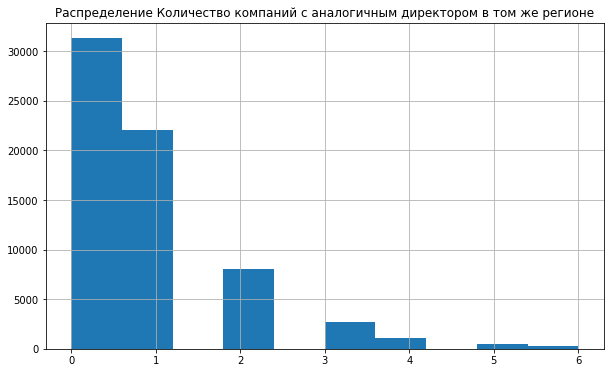

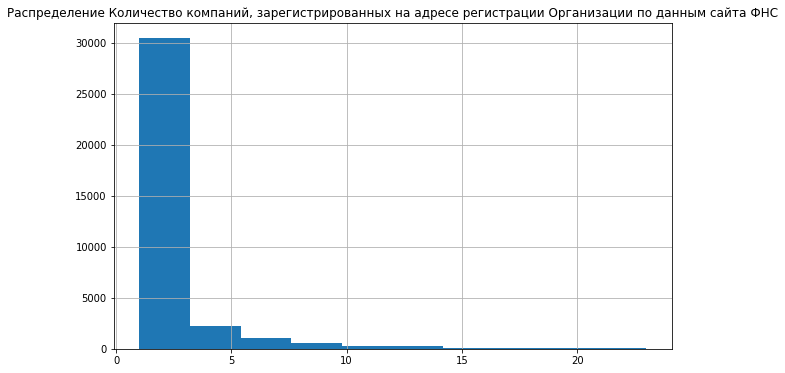

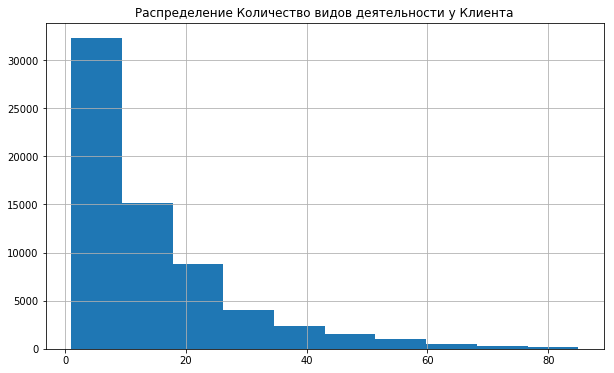

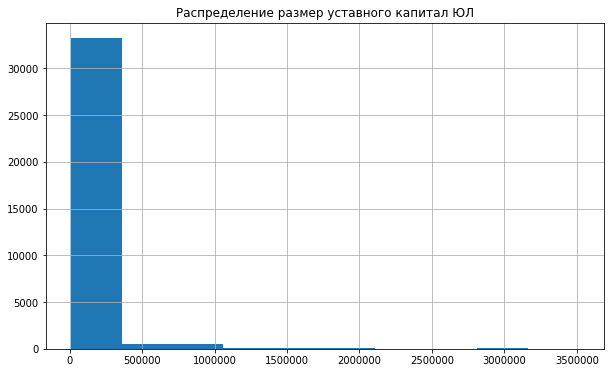

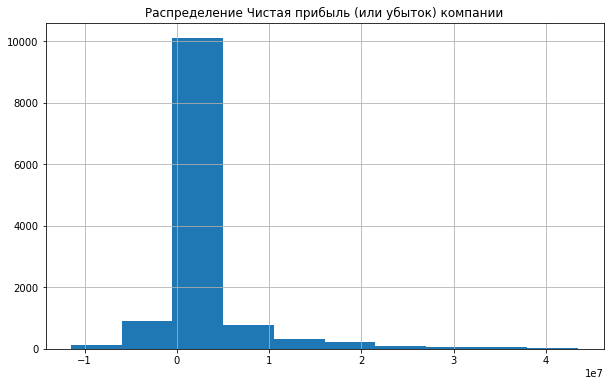

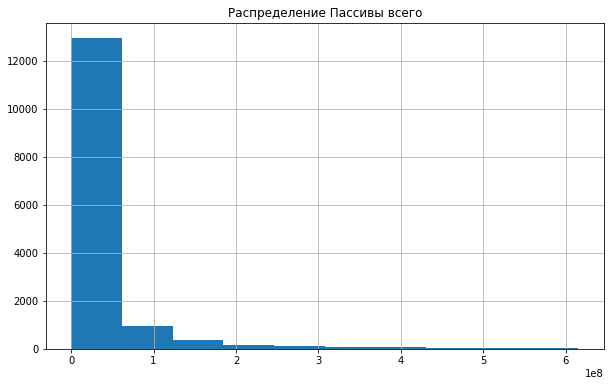

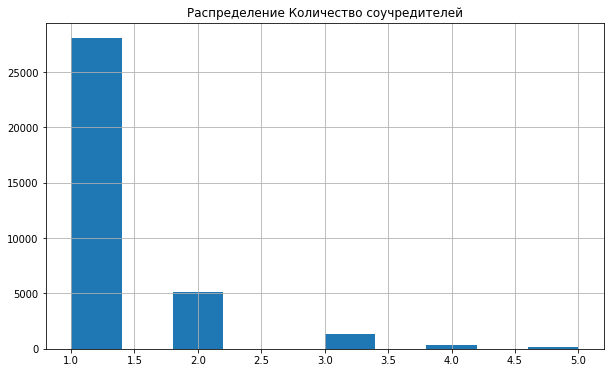

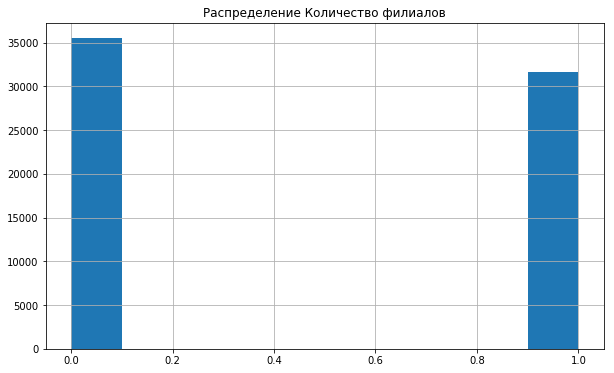

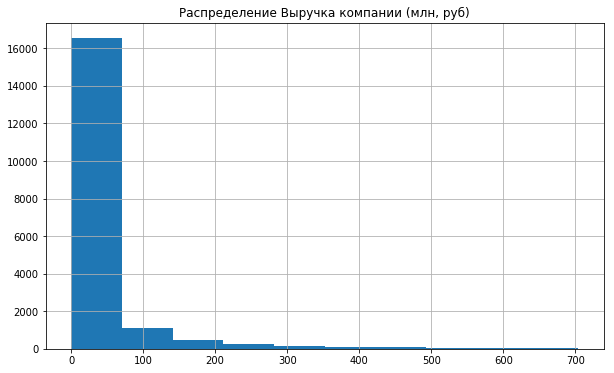

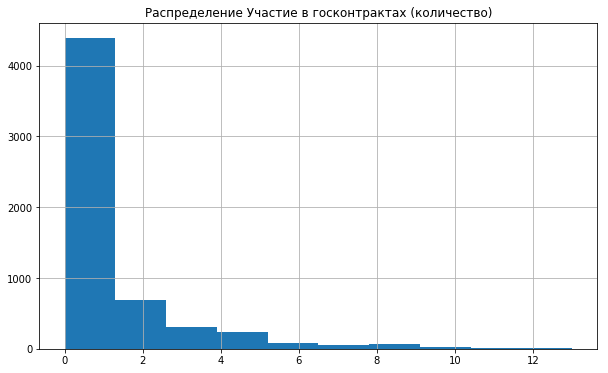

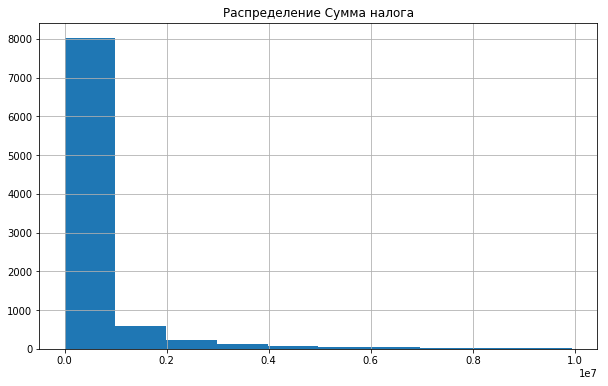

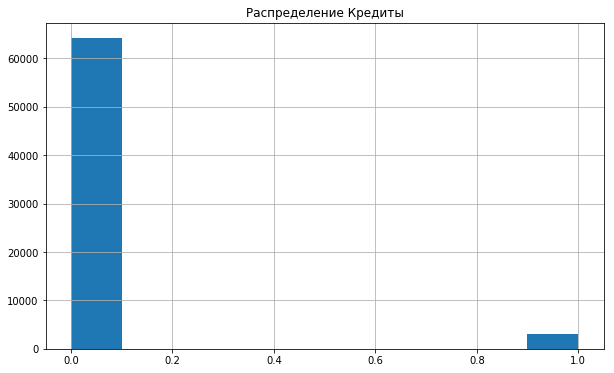

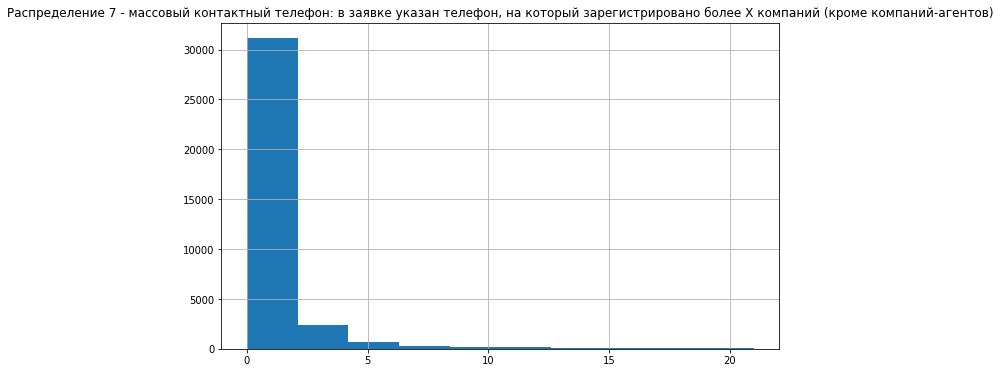

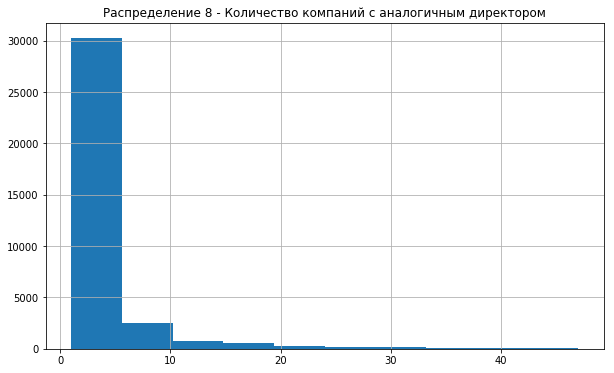

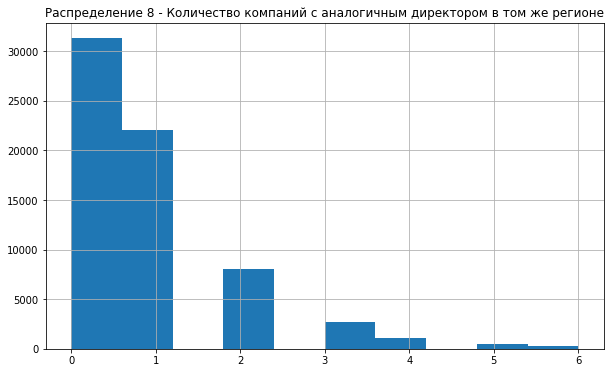

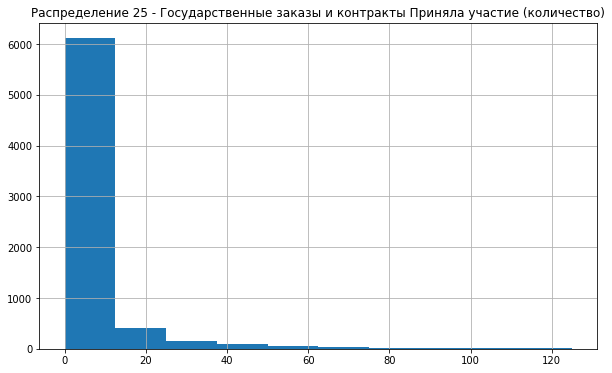

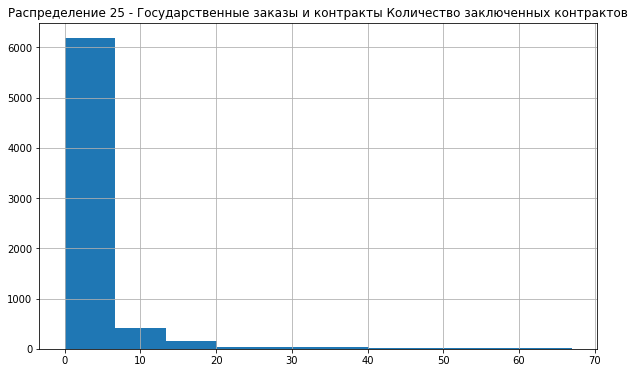

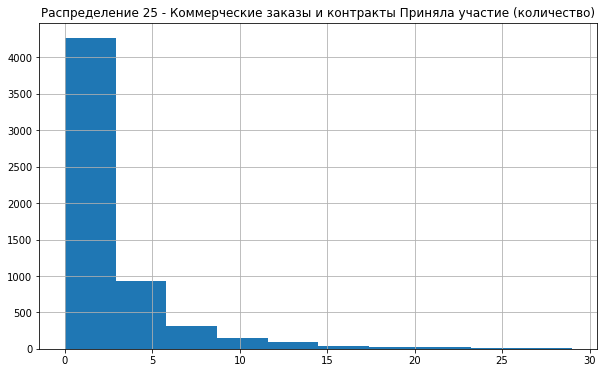

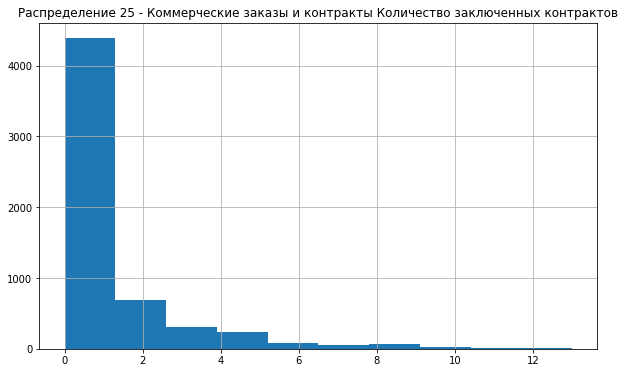

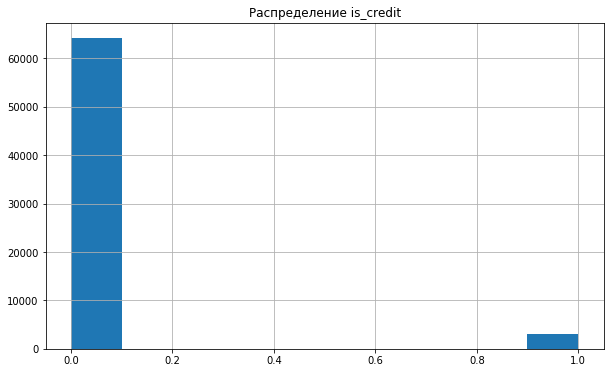

In [233]:
for col in float_columns:
    
    df[col].loc[lambda x: x <= float_99_quantile[col]]\
           .loc[lambda x: x >= float_1_quantile[col]]\
           .hist(figsize=(10,6), bins=10)
    plt.title('Распределение ' + col)
    plt.show()

## Распределение числовых признаков в разрезе целевой

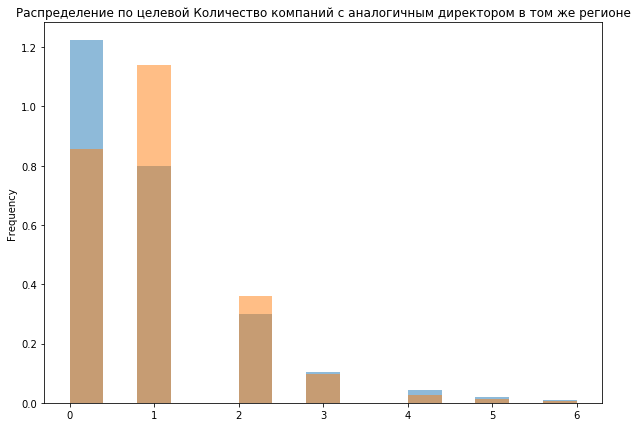

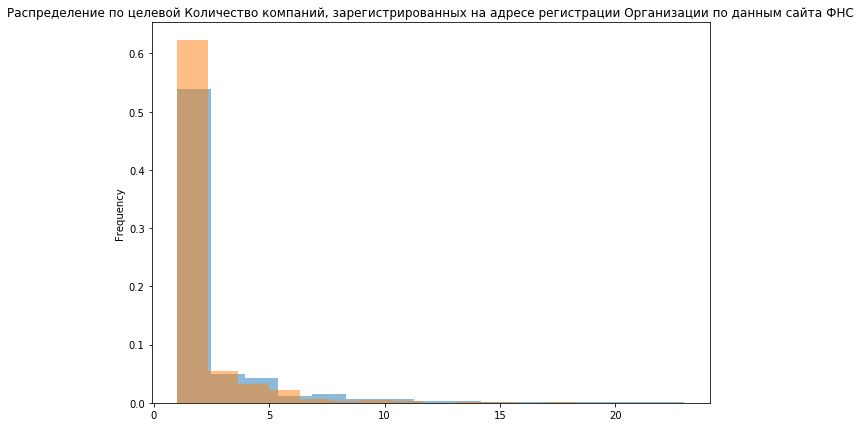

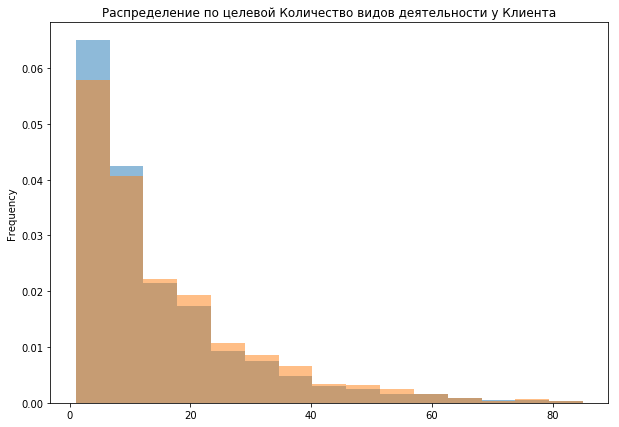

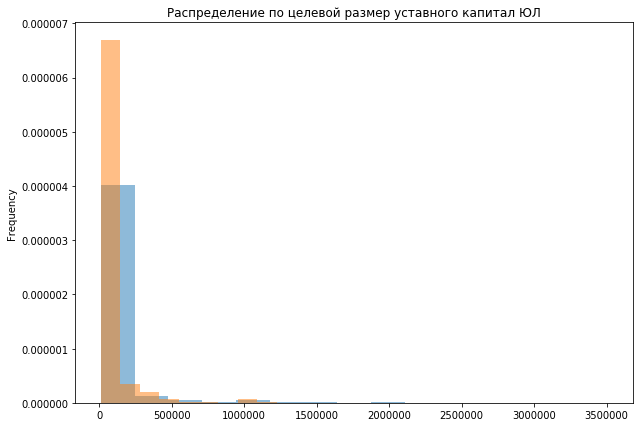

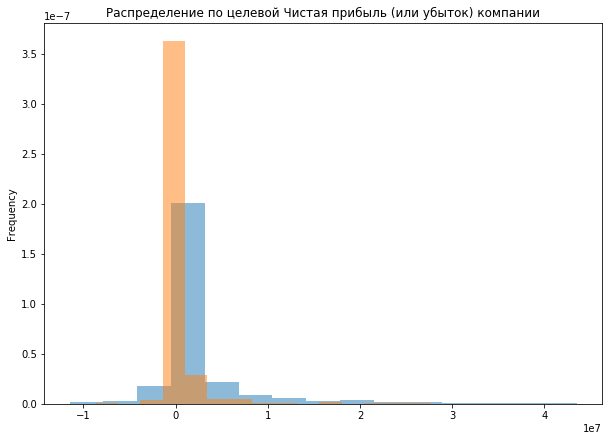

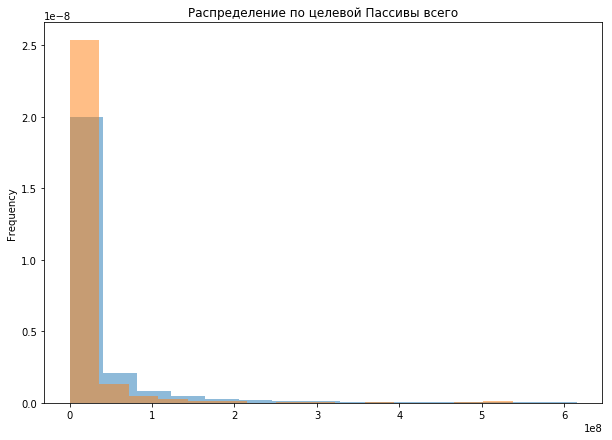

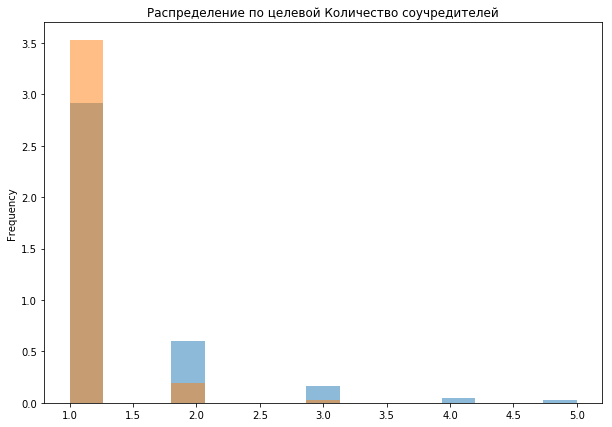

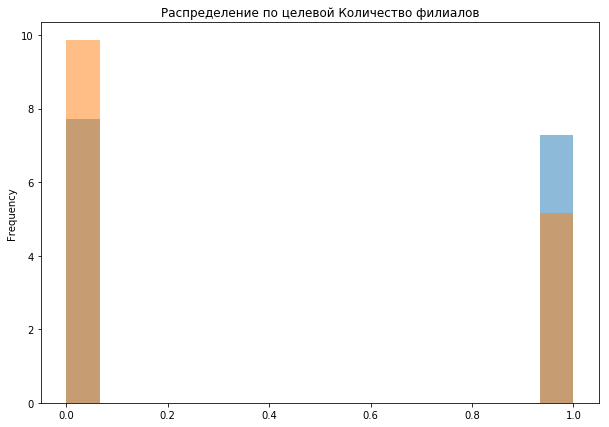

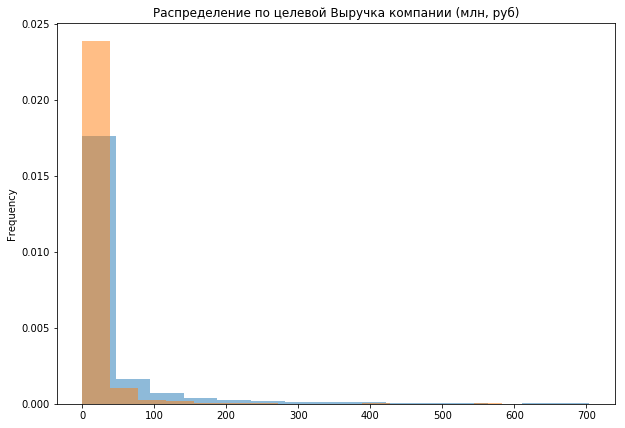

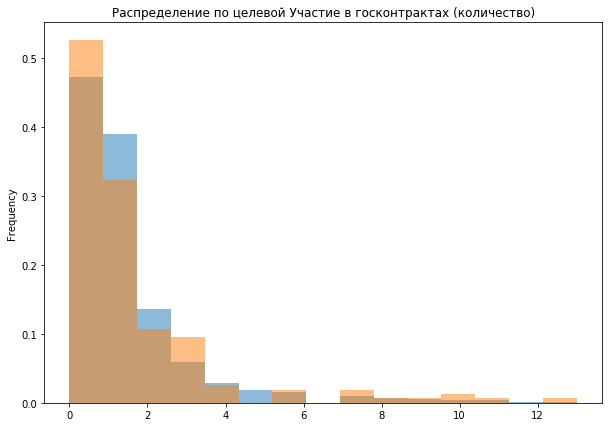

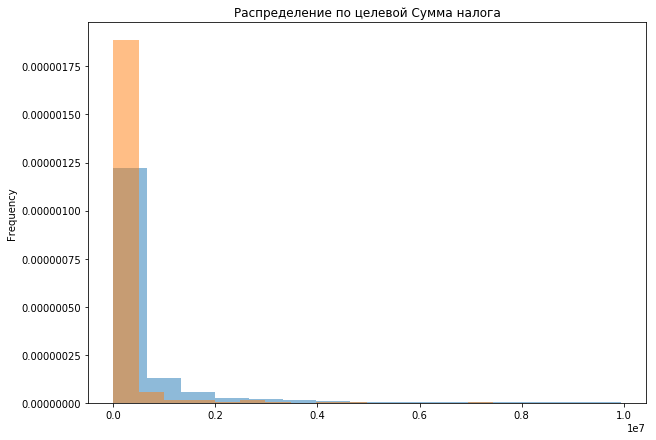

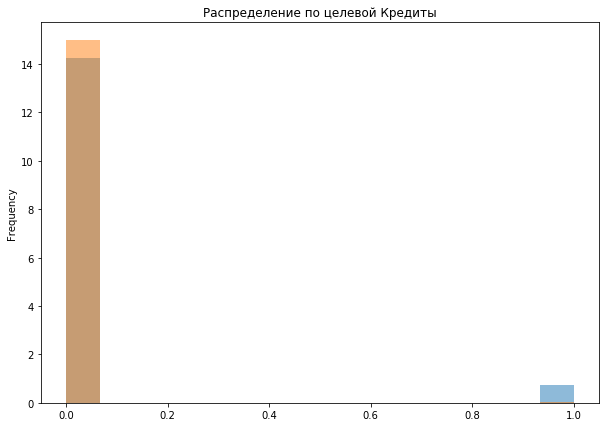

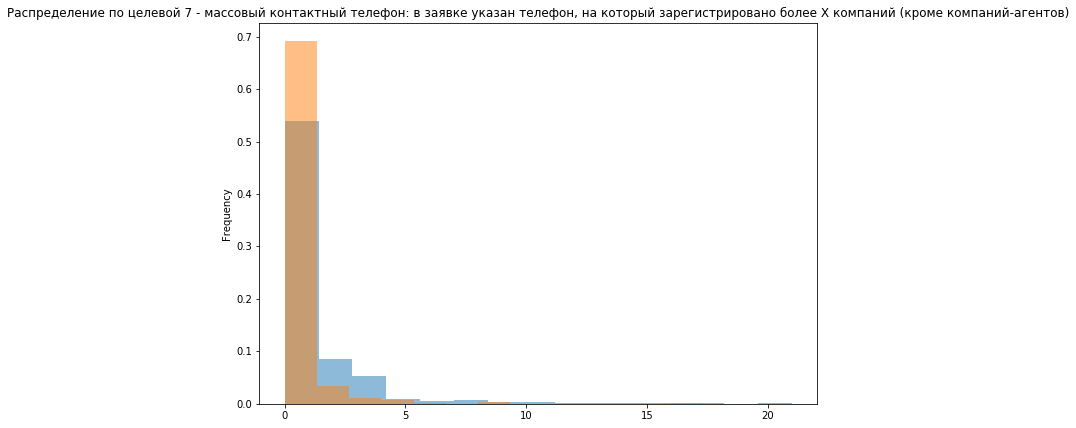

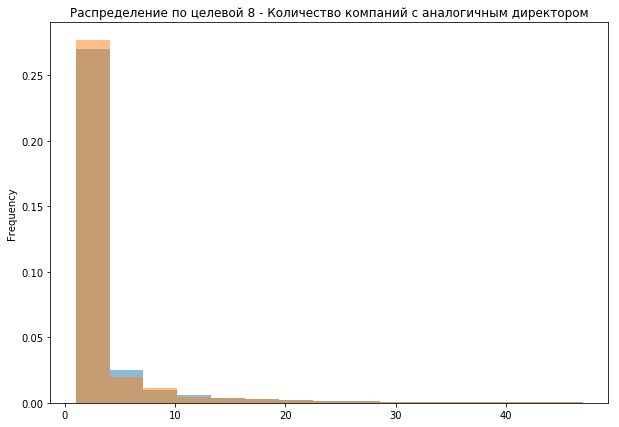

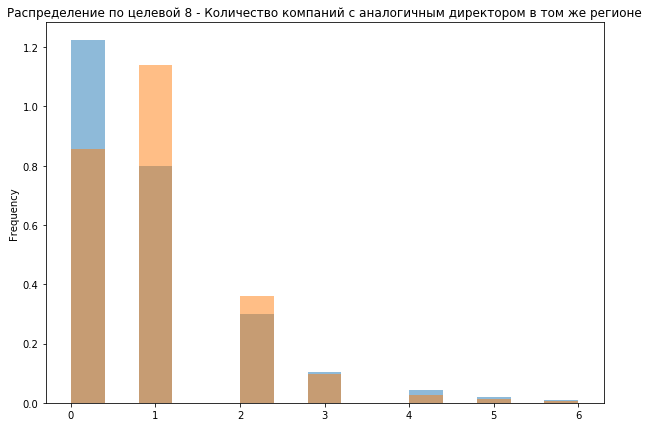

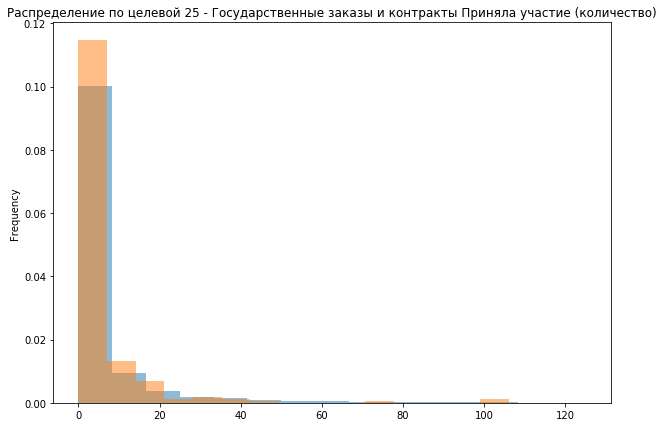

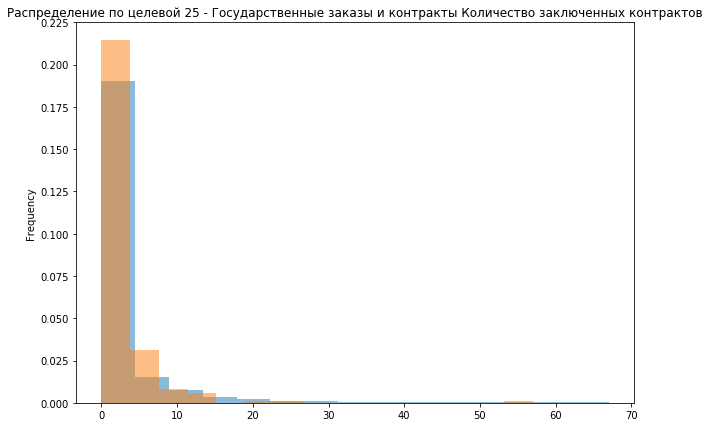

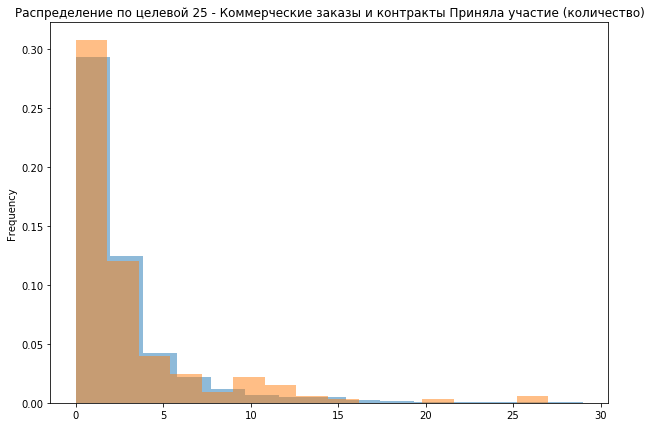

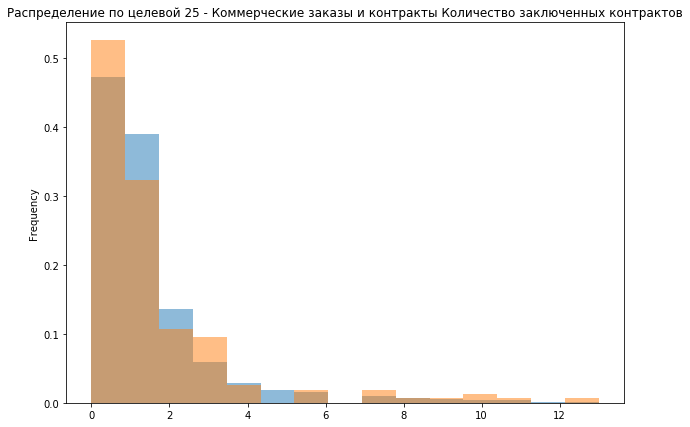

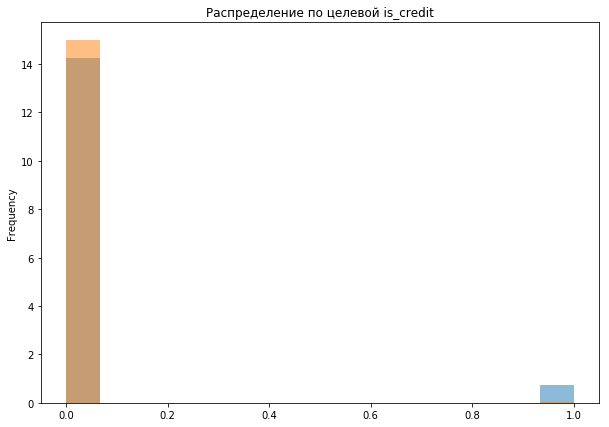

In [236]:
for col in float_columns:
    
    (
      df
        .loc[lambda x: x[col] <= float_99_quantile[col]]
        .loc[lambda x: x[col] >= float_1_quantile[col]]
        .groupby('target')[col]
        .plot(figsize=(10,7), kind='hist', alpha=0.5, density=True, bins=15)
    )
    plt.title('Распределение по целевой ' + col)
    plt.show()

# 3.2 Анализ категориальных переменных

In [237]:
df[category_columns].head()

,Субъект местонахождения,Отчетный период (год),Численность компании,Участие в госконтрактах (год),ОПФ Организации,код основного оквэд,Индекс финансового риска описание,Индекс должной осмотрительности описание
0,JH,nan,nan,nan,65-Общества с ограниченной ответственностью,52.24,Средний риск,Средний риск
1,IC,nan,nan,nan,50102-Индивидуальные предприниматели,47.78,nan,nan
2,OH,2017.0,16 .. 50,nan,65-Общества с ограниченной ответственностью,58,Низкий риск,Средний риск
3,AJ,nan,nan,nan,50102-Индивидуальные предприниматели,38.11,nan,nan
4,ON,2017.0,16 .. 50,2017.0,65-Общества с ограниченной ответственностью,80.10,Низкий риск,Низкий риск


In [238]:
for col in category_columns:
    print(df[col].value_counts().shape)
    print(df[col].value_counts())
    print('----------------------------')

(676,)
AJ    1329
AX     965
XW     579
MX     550
MU     540
      ... 
XI       5
FV       4
BV       4
WF       4
ZF       3
Name: Субъект местонахождения, Length: 676, dtype: int64
----------------------------
(20,)
nan       51801
2017.0    11672
2016.0     2544
2015.0      481
2018.0      346
2014.0       92
2013.0       71
2012.0       20
2008.0       14
2009.0       14
2010.0       14
2002.0       13
2007.0       13
2004.0       10
2006.0        9
2003.0        7
2011.0        7
2001.0        6
2005.0        6
2000.0        3
Name: Отчетный период (год), dtype: int64
----------------------------
(12,)
nan             50733
0 .. 5          11181
16 .. 50         1841
6 .. 10          1774
11 .. 15          887
51 .. 100         507
101 .. 150         87
251 .. 500         41
151 .. 200         41
201 .. 250         29
501 .. 1000        15
1001 .. 5000        7
Name: Численность компании, dtype: int64
----------------------------
(9,)
nan       61215
2018.0     2886
2017.0     1

### Преобразование категориальных фичей (лучше делать только на обучающей, фиксировать значения, и затем применять на тестовой выборке)

In [264]:
## Преобразования
df.loc[lambda x: x['Отчетный период (год)'].isin([str(i)+'.0' for i in range(2000, 2016)]), 'Отчетный период (год)'] = '2015.0'
df.loc[lambda x: x['Численность компании'].isin(['101 .. 150', '151 .. 200', '251 .. 500',
                                                 '201 .. 250', '501 .. 1000', '1001 .. 5000']), 'Численность компании'] = '101 .. 5000'

df.loc[lambda x: x['Участие в госконтрактах (год)'].isin([str(i)+'.0' for i in range(2000, 2016)]), 'Участие в госконтрактах (год)'] = '2015.0'

df['Индекс финансового риска описание'] = df['Индекс финансового риска описание'].map({'Расчет индекса не осуществляется для следующих категорий юридических лиц: Унитарные предприятия, находящиеся в федеральной или муниципальной собственности; Банки; Страховые компании; Некоммерческие организации; Организации без прав юридического лица.':'Расчет индекса не осуществляется',
                                                                                                  'Низкий риск':'Низкий риск',
                                                                                                  'Средний риск': 'Средний риск',
                                                                                                  'Высокий риск': 'Высокий риск'})

for col in category_columns: 
    
    values_in_categs = df[col].value_counts().loc[lambda x: x>500].index
    #.head(7)
    df.loc[lambda x: ~x[col].isin(values_in_categs), col] = None

In [240]:
#После преобразований
for col in category_columns:
    print(df[col].value_counts().shape)
    print(df[col].value_counts())
    print('----------------------------')

(6,)
AJ    1329
AX     965
XW     579
MX     550
MU     540
QX     510
Name: Субъект местонахождения, dtype: int64
----------------------------
(4,)
nan       51801
2017.0    11672
2016.0     2544
2015.0      780
Name: Отчетный период (год), dtype: int64
----------------------------
(6,)
nan          50733
0 .. 5       11181
16 .. 50      1841
6 .. 10       1774
11 .. 15       887
51 .. 100      507
Name: Численность компании, dtype: int64
----------------------------
(5,)
nan       61215
2018.0     2886
2017.0     1082
2015.0      783
2016.0      716
Name: Участие в госконтрактах (год), dtype: int64
----------------------------
(2,)
65-Общества с ограниченной ответственностью    34543
50102-Индивидуальные предприниматели           31021
Name: ОПФ Организации, dtype: int64
----------------------------
(21,)
41.20      3532
49.41      3106
68.20      1775
46.90      1620
46.73      1416
56.10      1134
73.11      1110
43.21      1069
47.11      1067
68.20.2     978
52.29       815
49.4 

### Распределения категориальных признаков относительно целевой

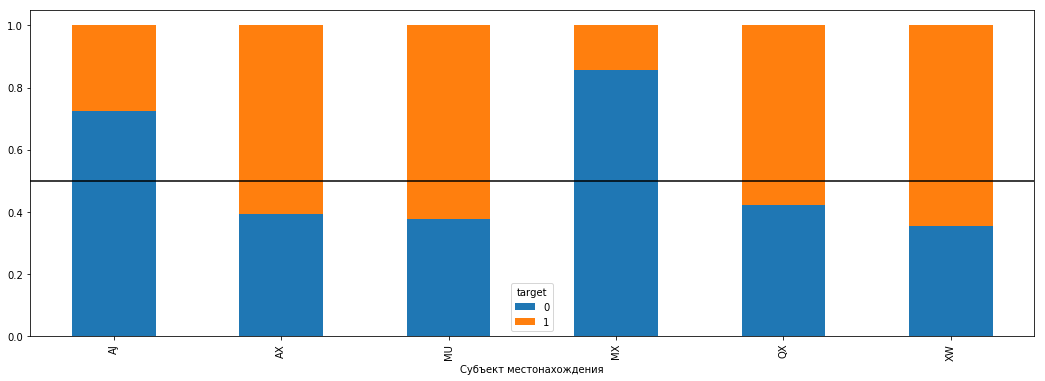

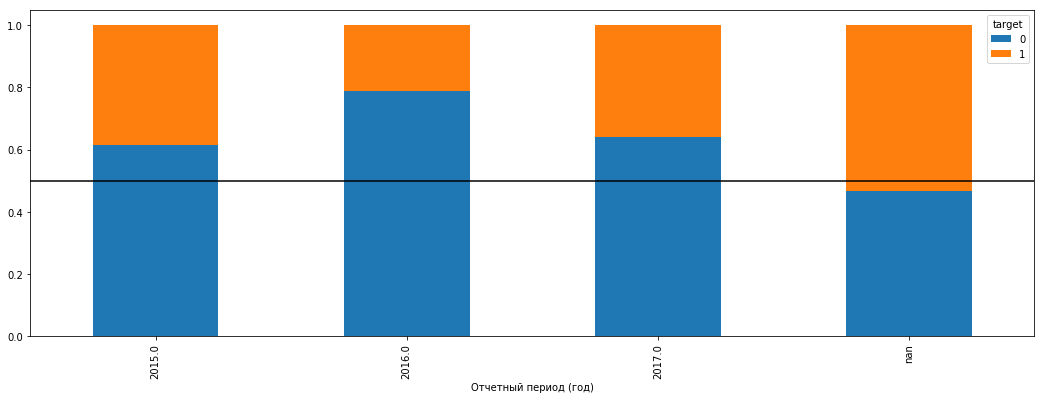

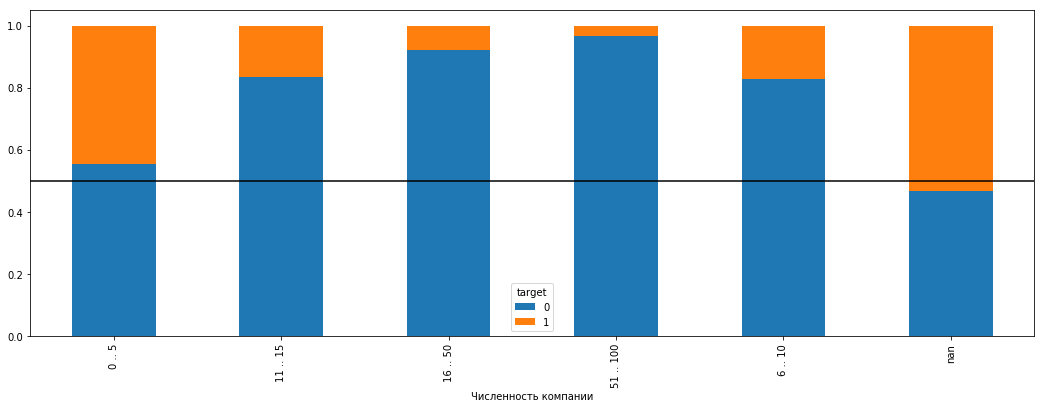

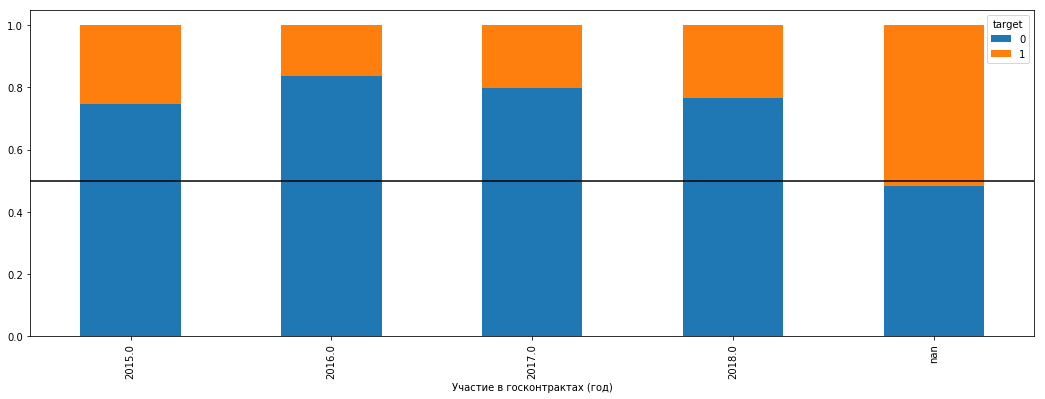

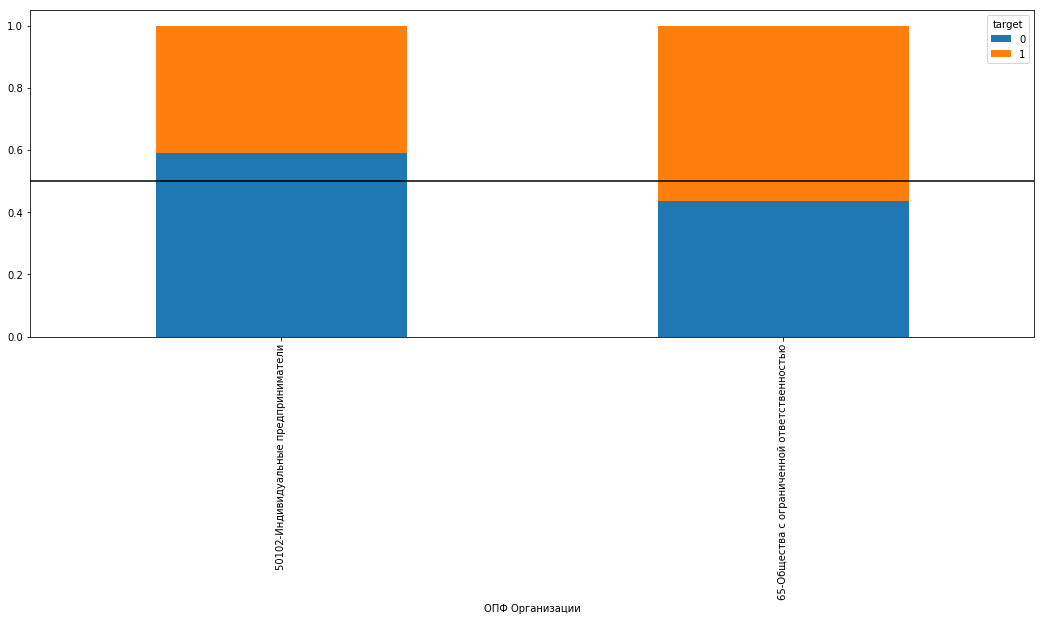

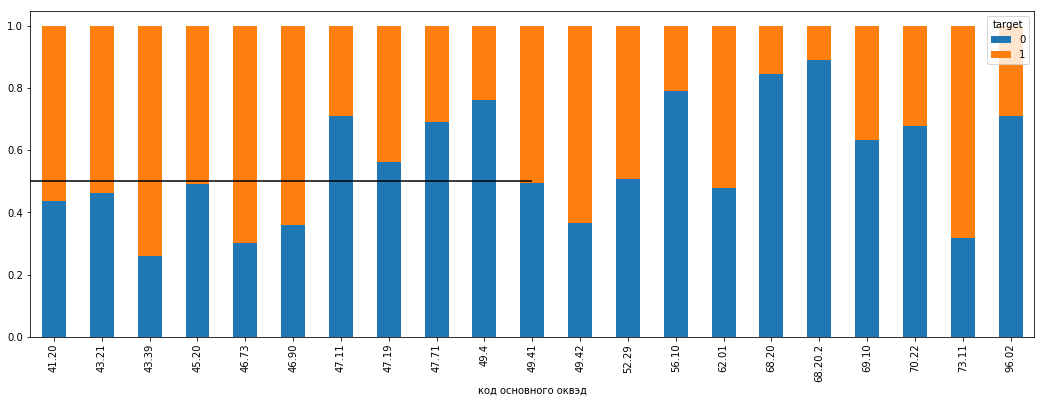

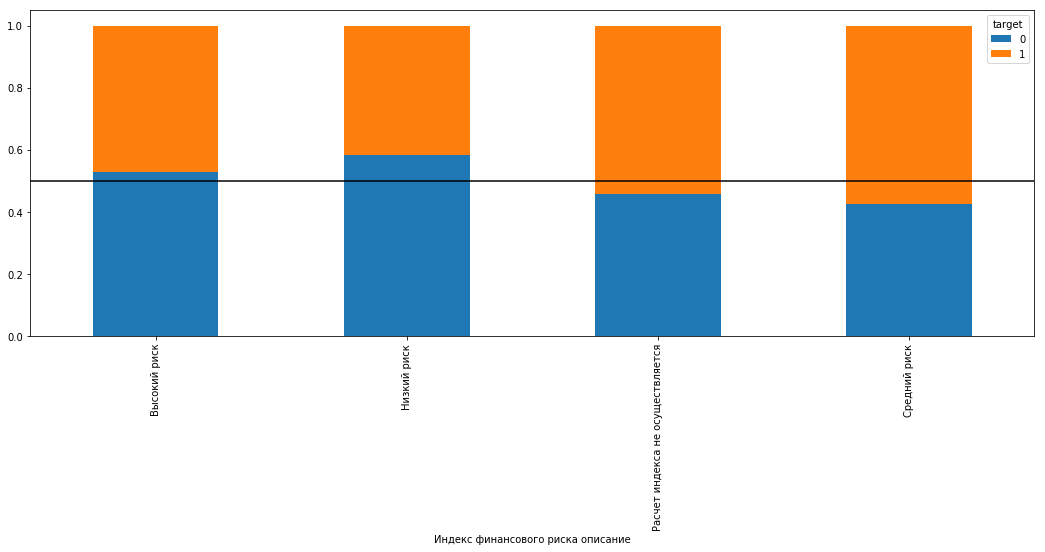

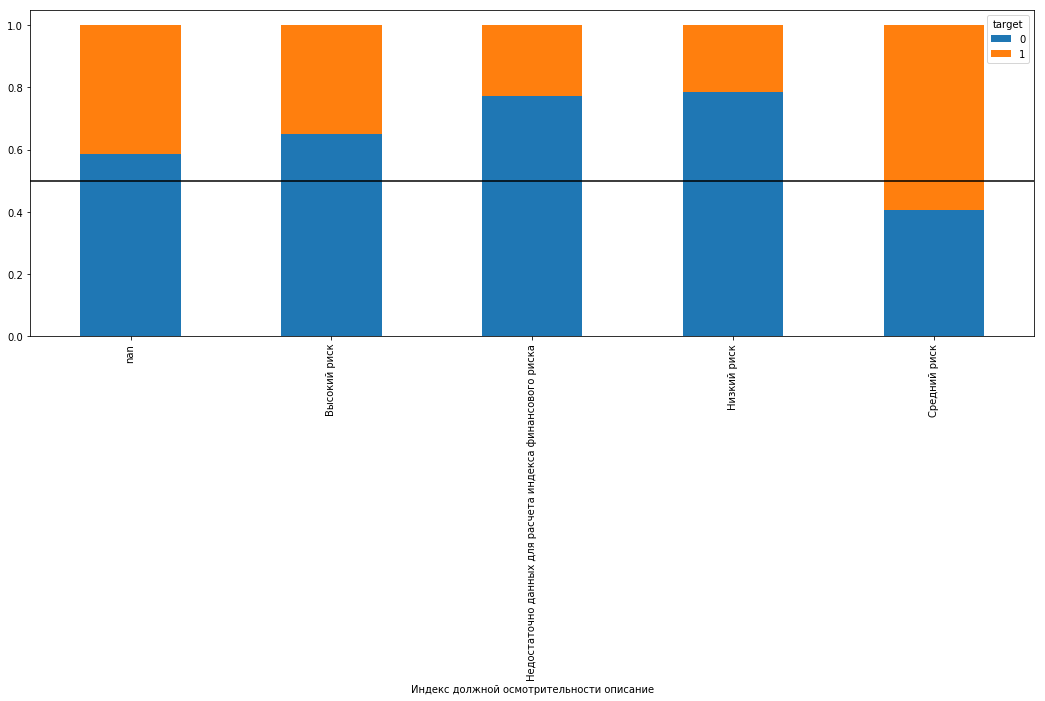

In [241]:
for col in category_columns:
    (df
       .groupby([col, 'target'])
       .size()
       .unstack()
       .apply(lambda x: x/ x.sum())
       .apply(lambda x: x/ x.sum(), axis=1)
       .plot
       .bar(stacked=True, figsize=(18,6))
    )
    plt.hlines(0.5, -1, 10)
    plt.show()

### При появлении новых даннных, важно делать преобразование категорий, чтобы список значений не выходил за рамки обучающей выборки

In [242]:
cat_unique_values = {}

for col in category_columns:
    cat_unique_values[col] = list(df[col].unique())
    
cat_unique_values

{'Субъект местонахождения': [None, 'AJ', 'MU', 'AX', 'XW', 'MX', 'QX'],
 'Отчетный период (год)': ['nan', '2017.0', '2015.0', None, '2016.0'],
 'Численность компании': ['nan',
  '16 .. 50',
  '0 .. 5',
  '6 .. 10',
  '51 .. 100',
  '11 .. 15',
  None],
 'Участие в госконтрактах (год)': ['nan',
  '2017.0',
  '2015.0',
  '2018.0',
  None,
  '2016.0'],
 'ОПФ Организации': ['65-Общества с ограниченной ответственностью',
  '50102-Индивидуальные предприниматели',
  None],
 'код основного оквэд': [None,
  '56.10',
  '52.29',
  '96.02',
  '49.42',
  '46.73',
  '68.20',
  '49.41',
  '43.21',
  '41.20',
  '47.71',
  '47.19',
  '70.22',
  '69.10',
  '73.11',
  '62.01',
  '45.20',
  '47.11',
  '43.39',
  '49.4',
  '46.90',
  '68.20.2'],
 'Индекс финансового риска описание': ['Средний риск',
  None,
  'Низкий риск',
  'Расчет индекса не осуществляется',
  'Высокий риск'],
 'Индекс должной осмотрительности описание': ['Средний риск',
  'nan',
  'Низкий риск',
  'Недостаточно данных для расчета индек

# 3.3 Коррелирующие признаки

In [243]:
corr_matrix = df[float_columns].corr()

for col in float_columns:
    print(corr_matrix[col].loc[lambda x: abs(x)>0.8].loc[lambda x: abs(x)<1])
    print('-------------------')

Series([], Name: Количество компаний с аналогичным директором в том же регионе, dtype: float64)
-------------------
Series([], Name: Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС, dtype: float64)
-------------------
Series([], Name: Количество видов деятельности у Клиента, dtype: float64)
-------------------
Series([], Name: размер уставного капитал ЮЛ, dtype: float64)
-------------------
Сумма налога    0.919539
Name: Чистая прибыль (или убыток) компании, dtype: float64
-------------------
Выручка компании (млн, руб)    0.869198
Name: Пассивы всего, dtype: float64
-------------------
Series([], Name: Количество соучредителей, dtype: float64)
-------------------
Series([], Name: Количество филиалов, dtype: float64)
-------------------
Пассивы всего    0.869198
Name: Выручка компании (млн, руб), dtype: float64
-------------------
Series([], Name: Участие в госконтрактах (количество), dtype: float64)
-------------------
Чистая прибыль (или 

Удалим скоррелированные признаки, оставляем более заполненный (по nan)

In [244]:
df = df.drop(['Кредиты', '25 - Коммерческие заказы и контракты Приняла участие (количество)', 
              '25 - Государственные заказы и контракты Количество заключенных контрактов'], axis=1)

# 4. Сохранение датасета

In [245]:
df.to_csv('vtb_preprocessing_dataset_target.csv', index=False, sep=';', encoding='cp1251')

In [246]:
print(df.shape)
df.head()

(67143, 34)


,inn,org_type,date_open_pc,target,Количество компаний с аналогичным директором в том же регионе,"Количество компаний, зарегистрированных на адресе регистрации Организации по данным сайта ФНС",Количество видов деятельности у Клиента,код основного оквэд,Субъект местонахождения,размер уставного капитал ЮЛ,Чистая прибыль (или убыток) компании,Отчетный период (год),Пассивы всего,дата начала полномочий руководителя,Количество соучредителей,Даты внесения соучредителей,Дата регистрации,Количество филиалов,Численность компании,"Выручка компании (млн, руб)",Участие в госконтрактах (количество),Участие в госконтрактах (год),Сумма налога,ОПФ Организации,"7 - массовый контактный телефон: в заявке указан телефон, на который зарегистрировано более Х компаний (кроме компаний-агентов)",8 - Количество компаний с аналогичным директором,8 - Количество компаний с аналогичным директором в том же регионе,25 - Государственные заказы и контракты Приняла участие (количество),25 - Коммерческие заказы и контракты Количество заключенных контрактов,Индекс финансового риска описание,Индекс должной осмотрительности описание,История смены сооучредителей,is_credit,month_date_open_pc
0,QZSCOUYDPK,ЮЛ,2019-03-13 00:00:00,0,2.0,1.0,10.0,None,None,10000.0,NaN,nan,NaN,24.01.2018,1.0,24.01.2018,24.01.2018,0.0,nan,NaN,NaN,nan,NaN,65-Общества с ограниченной ответственностью,1.0,2.0,2.0,NaN,NaN,Средний риск,Средний риск,ЮЛ: 24.01.2018 0:00:00,0.0,2019-03-01
1,XGJYAHPQJUMT,ИП,2019-02-18 00:00:00,0,0.0,NaN,3.0,None,None,NaN,NaN,nan,NaN,NaN,NaN,NaN,19.10.2018,1.0,nan,NaN,NaN,nan,NaN,50102-Индивидуальные предприниматели,NaN,NaN,0.0,NaN,NaN,None,nan,NaN,0.0,2019-02-01
2,JGRZVAAXTH,ЮЛ,2019-03-29 00:00:00,0,3.0,3.0,18.0,None,None,19600.0,7445830.0,2017.0,34270600.0,13.05.2011;27.09.2007,3.0,13.01.2014;13.05.2011;01.02.2010,27.09.2007,0.0,16 .. 50,30.5,NaN,nan,NaN,65-Общества с ограниченной ответственностью,29.0,3.0,3.0,2.0,NaN,Низкий риск,Средний риск,ЮЛ: 13.01.2014 0:00:00; ЮЛ: 13.05.2011 0:00:00...,0.0,2019-03-01
3,CQNMOOTKHQAN,ИП,2018-11-15 00:00:00,0,0.0,NaN,5.0,None,AJ,NaN,NaN,nan,NaN,NaN,NaN,NaN,09.11.2018,1.0,nan,NaN,NaN,nan,NaN,50102-Индивидуальные предприниматели,NaN,NaN,0.0,NaN,NaN,None,nan,NaN,0.0,2018-11-01
4,RDDXQARZUE,ЮЛ,2019-03-29 00:00:00,0,2.0,11.0,3.0,None,None,260000.0,3784950.0,2017.0,1063230.0,26.11.2013;08.11.2012;09.12.2011;22.10.2008;15...,2.0,05.09.2013;09.12.2011;22.10.2008,15.11.2007,0.0,16 .. 50,44.4,0.0,2017.0,NaN,65-Общества с ограниченной ответственностью,1.0,2.0,2.0,0.0,0.0,Низкий риск,Низкий риск,ЮЛ: 05.09.2013 0:00:00; ЮЛ: 09.12.2011 0:00:00...,0.0,2019-03-01


## Необходимо сохранить значений категориальных фичей и заполнения, чтобы корректно нормировать новые данные для тестовых выборок